In [71]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime

%matplotlib inline

In [2]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                        squeeze=True, parse_dates=['Date'])

In [3]:
avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [4]:
avocado_mean.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [5]:
#Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). 
#Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [6]:
avocado_mean_rolling = avocado_mean.rolling(window=3).mean()

In [7]:
avocado_mean_rolling.max()

AveragePrice    1.849321
dtype: float64

In [8]:
# Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), 
# посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

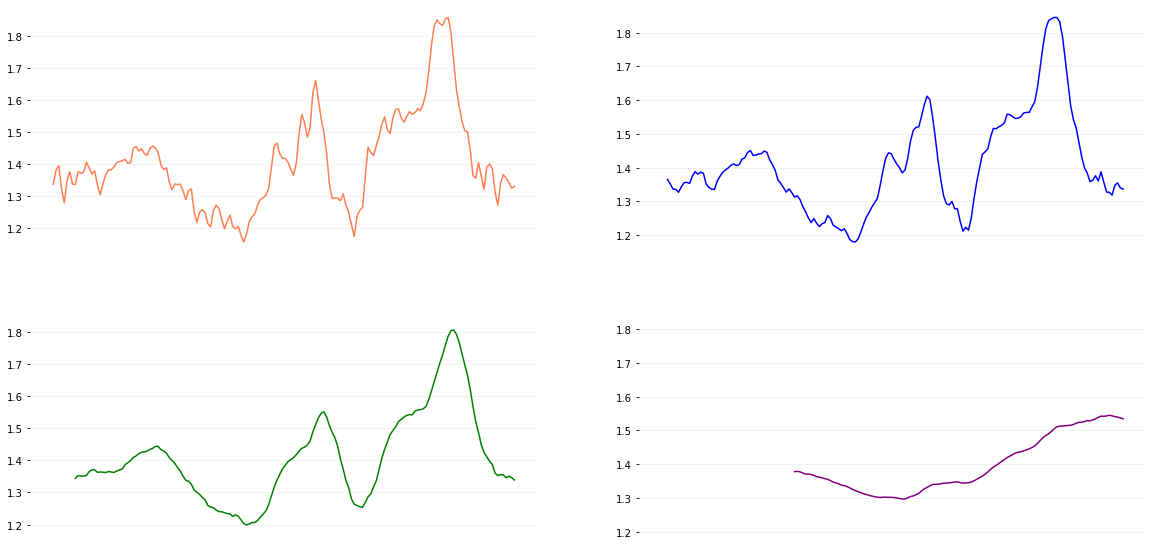

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
windows = [2, 4, 10, 50]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)

for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)

In [10]:
avocado_mean.ewm(span=2).mean()

,AveragePrice
0,1.301296
1,1.353310
2,1.379480
3,1.391394
4,1.294758
...,...
164,1.356212
165,1.352194
166,1.340793
167,1.322734


In [32]:
avocado_full = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_6/avocado_full.csv', 
                           index_col=0)

In [35]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [45]:
avocado_full_rolling_mean = avocado_full.query("region == 'Chicago' and type == 'organic'")\
    .AveragePrice\
    .rolling(window=4).mean()
avocado_full_rolling_mean = avocado_full_rolling_mean.reset_index()
avocado_full_rolling_mean['Date'] = pd.to_datetime(avocado_full_rolling_mean.Date)
avocado_full_rolling_mean.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [55]:
fig = px.line(avocado_full_rolling_mean, x="Date", y="AveragePrice", title='скользящее среднее')
fig.show()

In [47]:
avocado_full_ewm_mean = avocado_full.query("region == 'Chicago' and type == 'organic'")\
    .AveragePrice\
    .ewm(span=4).mean()
avocado_full_ewm_mean = avocado_full_ewm_mean.reset_index()
avocado_full_ewm_mean['Date'] = pd.to_datetime(avocado_full_ewm_mean.Date)
avocado_full_ewm_mean.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [54]:
fig = px.line(avocado_full_ewm_mean, x="Date", y="AveragePrice", title='Экспоненциальное')
fig.show()

In [56]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_6/delays.csv')

In [59]:
df.delay = df.delay.apply(lambda x: x.replace('-', ''))

In [61]:
df.delay = pd.to_timedelta(df.delay)

In [65]:
df['delay_categorical'] = pd.cut(df.delay, bins=3)

In [74]:
df.delay_categorical.max()

Interval(Timedelta('3 days 08:05:36.333333333'), Timedelta('4 days 23:51:14'), closed='right')

In [66]:
# Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. 
# В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

# 'less than 1 day' – время от 0 до 1 дня
# '1-2 days' – от 1 до 2 дней
# '2-3 days' – от 2 до 3 дней
#  'more than 3 days' – больше 3 дней

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [76]:
delay_categorical_names = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
delay_categorical_mean = [datetime.timedelta(days = 0), datetime.timedelta(days = 1),
                          datetime.timedelta(days = 2), datetime.timedelta(days = 3),
                          datetime.timedelta(days = 10)]

In [79]:
df['delay_categorical'] = pd.cut(df.delay, delay_categorical_mean, right=True, labels=delay_categorical_names)

In [80]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [82]:
import plotly.express as px

fig = px.histogram(df, x='delay_categorical', y='company_id')
fig.show()